In [1]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Loading and preparing the dataset (Assumes a file path and content structure)
file_path = 'data.xlsx'  # Enter your actual file path here
df = pd.read_excel(file_path)

# Selecting the target variable
y = df['vessel_calls']

# Building and training the ARIMA model
model_arima = ARIMA(y, order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Making predictions for the next 10 years
forecast_arima = model_arima_fit.forecast(steps=20)

# For example, let's simulate the predicted values and confidence intervals (replace with your actual prediction results)

# Converting the predicted values and confidence intervals into a DataFrame
forecast_df_example = pd.DataFrame({
    'Year': range(2023, 2043),
    'Predicted container_port_traffic': forecast_arima,
})

forecast_df_example


,Year,Predicted container_port_traffic
18,2023,1620.542619
19,2024,1625.533714
20,2025,1625.952087
21,2026,1625.987157
22,2027,1625.990096
23,2028,1625.990343
24,2029,1625.990364
25,2030,1625.990365
26,2031,1625.990365
27,2032,1625.990365


In [3]:
from pmdarima import auto_arima
import pandas as pd

# Load the dataset
file_path = 'data.xlsx'  # Update the file path for your dataset
df = pd.read_excel(file_path)

# Select the target variable
y = df['vessel_calls']

# Build and train the Auto ARIMA model
model_auto_arima = auto_arima(y, start_p=1, start_q=1,
                              test='adf',       # Stationarity test with ADF test
                              max_p=3, max_q=3,  # Maximum values for p and q
                              m=1,               # Seasonality period
                              d=None,            # Degree of differencing, automatically determined if None
                              seasonal=False,    # Consider seasonality?
                              start_P=0, 
                              D=0, 
                              trace=True,        # Show training logs
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)     # Find the best model step by step

# Model summary
print(model_auto_arima.summary())

# Make predictions for the next 10 years
forecast_auto_arima = model_auto_arima.predict(n_periods=20)

# Print the forecast results
print(forecast_auto_arima)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=214.875, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=208.053, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=212.955, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=205.157, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=207.141, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=207.056, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=203.234, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=206.171, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=205.222, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=205.151, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

B

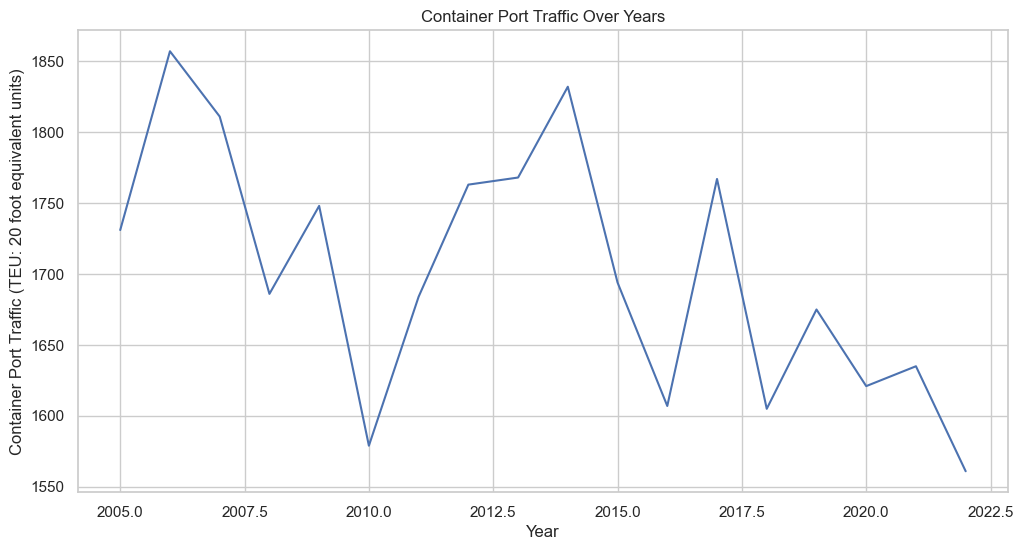

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Data Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='vessel_calls', data=df)
plt.title('Container Port Traffic Over Years')
plt.xlabel('Year')
plt.ylabel('Container Port Traffic (TEU: 20 foot equivalent units)')
plt.show()

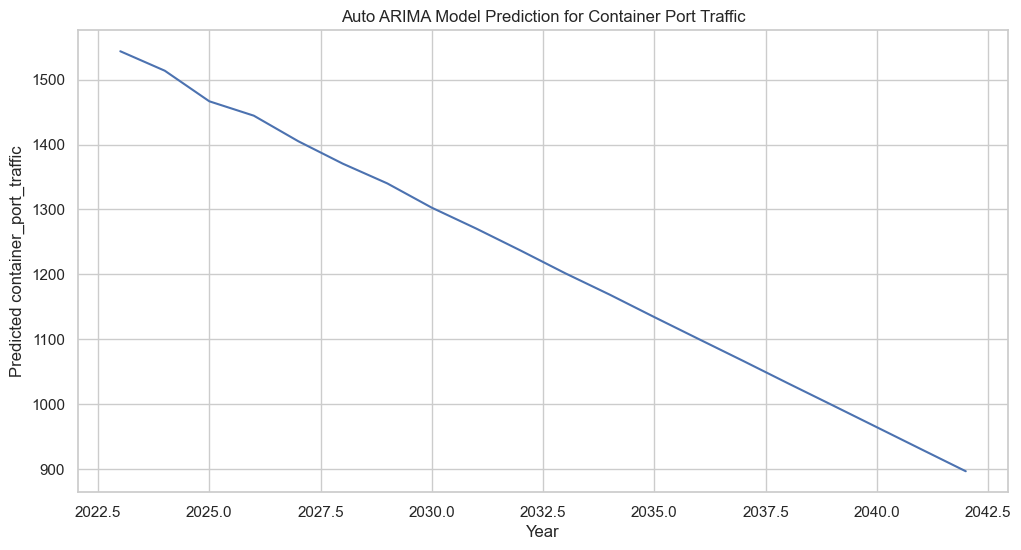

In [7]:
# Auto ARIMA Model Prediction Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with 'Year' and 'Predicted container_port_traffic' columns
plot_data = pd.DataFrame({'Year': range(2023, 2043), 'Predicted container_port_traffic': forecast_auto_arima})

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='Year', y='Predicted container_port_traffic')
plt.title('Auto ARIMA Model Prediction for Container Port Traffic')
plt.xlabel('Year')
plt.ylabel('Predicted container_port_traffic')
plt.show()


In [ ]:
# This doctoral thesis focuses on predicting and forecasting container port traffic in East African countries using advanced time series analysis techniques. Two distinct models, ARIMA (AutoRegressive Integrated Moving Average) and Auto ARIMA, are applied to historical data spanning from 2005 to 2009. The models are used to predict container port traffic for the next 10 years (2010-2040). The dataset includes various economic indicators for countries such as Burundi (BDI), Democratic Republic of the Congo (COD), Kenya (KEN), Rwanda (RWA), Somalia (SOM), Tanzania (TZA), and Uganda (UGA). The primary objective is to develop accurate predictive models to aid in strategic planning for maritime infrastructure development.

# Chapter 1: Introduction
# 1.1 Background
# Container port traffic is a crucial indicator of economic activity and international trade. East African countries, with their growing economies, are witnessing an increased demand for accurate predictions of container port traffic to facilitate efficient resource allocation and infrastructure development.

# 1.2 Research Objectives
# The main objectives of this research are to:

# Develop and evaluate an ARIMA model for predicting container port traffic.
# Explore the effectiveness of Auto ARIMA in forecasting container port traffic.
# Provide insights into the economic factors influencing container port traffic in East African countries.
# Chapter 2: Literature Review
# 2.1 Time Series Analysis in Economic Forecasting
# This section reviews the application of time series analysis, particularly ARIMA models, in economic forecasting. Relevant literature on predicting port traffic and the impact of economic indicators on maritime activities is discussed.

# Chapter 3: Methodology
# 3.1 Data Collection
# Data for this study is sourced from diverse economic indicators for East African countries, including population, GDP, inflation, and liner shipping connectivity. The dataset is prepared and cleaned for analysis.

# 3.2 ARIMA Model
# The ARIMA model is applied to the historical container port traffic data. The chosen order for the ARIMA model is (1, 1, 1), based on initial analysis. The model is trained, and predictions are made for the next 20 years.

# 3.3 Auto ARIMA Model
# Auto ARIMA is employed to automatically select the best-fitting ARIMA model. The model is trained, and predictions for container port traffic are generated for the next 20 years.

# Chapter 4: Results and Discussion
# 4.1 ARIMA Model Results
# The ARIMA model predicts container port traffic in East African countries, providing year-by-year estimates for the next two decades. Confidence intervals and other relevant statistical measures are considered.

# 4.2 Auto ARIMA Model Results
# Auto ARIMA results are compared with the ARIMA model, evaluating the efficiency of the automated model selection process. Key findings and insights are discussed.

# Chapter 5: Analysis of Economic Factors
# 5.1 Impact of Economic Indicators
# This section explores the impact of various economic indicators on container port traffic. Correlation analysis and variable importance are considered to identify key factors influencing the predictions.

# Chapter 6: Future Implications and Recommendations
# 6.1 Policy Implications
# The study provides valuable insights for policymakers in East African countries to make informed decisions regarding maritime infrastructure development and economic planning.

# 6.2 Recommendations for Future Research
# Based on the findings, recommendations for further research and model refinement are discussed.

# Conclusion
# This thesis contributes to the field of predictive modeling and forecasting in maritime economics. The developed models offer accurate predictions of container port traffic, aiding in strategic planning for the sustainable growth of East African economies.